# Glossary

Cross-Entropy

Marcel Turcotte (School of Electrical Engineering and Computer Science,
University of Ottawa)  
2025-07-10

Cross-entropy measures the difference between a predicted probability
distribution and the true distribution, typically represented by one-hot
encoded labels. It quantifies the penalty or error in prediction,
commonly used as a loss function in classification tasks, with lower
values indicating better model performance.

The equation for cross-entropy $H(p, q)$ is:

$$
H(p, q) = -\sum_{k} p_k \log(q_k)
$$

where:

-   $p_k$ is the true probability distribution (typically one-hot
    encoded labels),
-   $q_k$ is the predicted probability distribution,
-   the sum runs over all classes $k$.

In binary classification, this simplifies to:

$$
H(y, \hat{y}) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]
$$

where:

-   $y$ is the true label (either 0 or 1),
-   $\hat{y}$ is the predicted probability of the positive class.

When $y$, the true label, is one-hot encoded for multiclass
classification, it represents the class as a vector where the element
corresponding to the correct class is 1, and all other elements are 0.
This encoding allows the cross-entropy loss to focus only on the
predicted probability for the true class, penalizing the model based on
how far the predicted probability deviates from 1 for the correct class.

In neural networks, the values of $\hat{y}_k$ are generally obtained by
applying the softmax function to the outputs of the final layer.

The Python program below demonstrates how cross-entropy loss for one
example varies with changes in the predicted probability, represented as
$-\log(\hat{y}_k)$, as it deviates from 1 for the true class label
($y_k$). When $\hat{y}_k$ approaches 1, the loss for a single example
approaches 0, indicating no penalty. Conversely, as $\hat{y}_k$
approaches 0, the loss tends toward positive infinity, imposing a
substantial penalty for assigning a low probability to the correct
class. This logarithmic relationship ensures that the loss function
heavily penalizes incorrect predictions, particularly when the predicted
probability for the correct class is near zero.

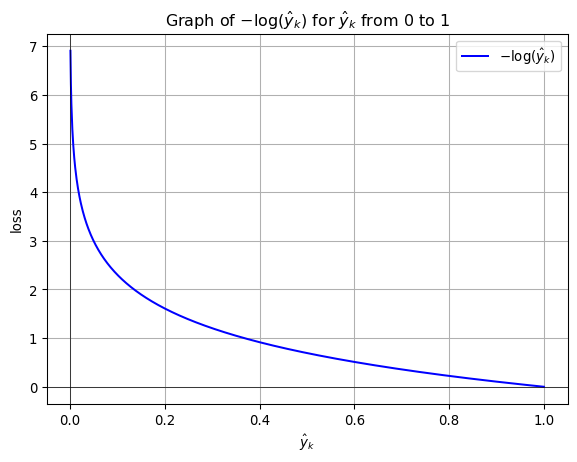

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an array of p values from just above 0 to 1
p_values = np.linspace(0.001, 1, 1000)

# Compute the natural logarithm of each p value
ln_p_values = - np.log(p_values)

# Plot the graph
plt.plot(p_values, ln_p_values, label=r'$-\log(\hat{y}_k)$', color='b')

# Add labels and title
plt.xlabel(r'$\hat{y}_k$')
plt.ylabel(r'loss')
plt.title(r'Graph of $-\log(\hat{y}_k)$ for $\hat{y}_k$ from 0 to 1')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', lw=0.5)  # Add vertical line at x=0

# Display the plot
plt.legend()
plt.show()

Consider a multiclass classification problem with three classes
$(C_1, C_2, C_3)$. Suppose the true class of the given example is $C_2$,
and the model outputs the following predicted probabilities:

$$
\hat{y} = [0.2, 0.7, 0.1]
$$

The one-hot encoded true label ${y}$ for $C_2$ is:

$$
{y} = [0, 1, 0]
$$

Using the cross-entropy formula:

$$
H({y}, \hat{y}) = -\sum_{k} y_k \log(\hat{y}_k)
$$

Substituting the values:

$$
H({y}, \hat{y}) = -[0 \cdot \log(0.2) + 1 \cdot \log(0.7) + 0 \cdot \log(0.1)]
$$

Since only the term corresponding to the true class (second class) is
non-zero, the calculation simplifies to:

$$
H({y}, \hat{y}) = -\log(0.7)
$$

Calculating this:

$$
H({y}, \hat{y}) \approx -(-0.357) = 0.357
$$

Thus, the cross-entropy loss for this example is approximately 0.357,
indicating the penalty for the model’s deviation from the correct class
probability.

When calculating the average cross-entropy loss over a dataset with
multiple examples, the loss function is summed over all examples and
then divided by the number of examples to obtain the average loss. The
equation for the average cross-entropy loss is:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k}) 
$$

where:

-   $N$ is the total number of examples in the dataset,
-   $K$ is the number of classes,
-   $y_{i,k}$ is the true binary indicator (0 or 1) for whether the
    $i$-th example belongs to class $k$,
-   $\hat{y}_{i,k}$ is the predicted probability that the $i$-th example
    belongs to class $k$.

This formulation calculates the average loss across all examples,
providing a single scalar value that represents the model’s performance
over the entire dataset.